# Tema 2: Procesamiento de imágenes digitales. Operaiones Morfológicas


Se trata de una teoría para el procesamiento de imágenes digitales que permite realizar filtrados de tipo no lineal sobre las mismas basándose en las formas y configuraciones de las máscaras (llamadas elementos estructurantes) y en un conjunto de operaciones básicas permitidas (erosión, dilatación, apertura y cierre) relacionadas con la teoría de conjuntos. Inicialmente se desarrolló la morfología matematica aplicada a imágenes binarias para después extender la teoría a imágenes en niveles de gris. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Morfología matemática aplicada a imágenes binarias

Comenzaremos cargando una imagen en niveles de gris, que convertiremos en binaria (mediante una umbralización), y a la que le aplicaremos las operaciones de "dilatación" y "erosión" morfológicas.

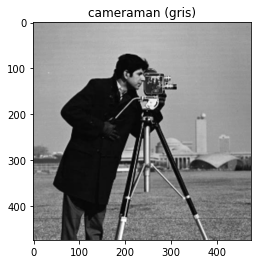

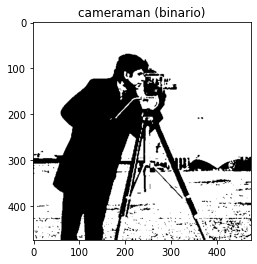

In [2]:
# Se carga la imagen del "cameraman" en niveles de gris y se convierte a binaria
plt.title('cameraman (gris)')
image = cv2.imread("cameraman.png",0)
plt.imshow(image, cmap="gray")
plt.show()

plt.title('cameraman (binario)')
image = ((image > 100)*255).astype(np.uint8) # umbralización con numpy (se puede hacer con cv2.threshold)
plt.imshow(image,cmap="gray")
plt.show()

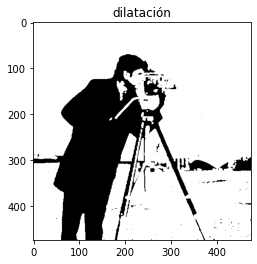

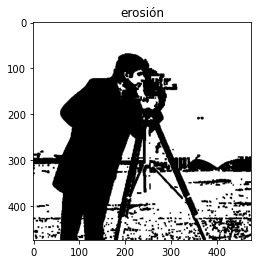

In [3]:
# A continuación a la imagen binaria se le aplican las operaciones de "erosión" y "dilatación" morfológicas
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)) # creamos primero el elemento estructurante

dilated_image = cv2.dilate(image,kernel) # dilatamos con la máscara creada
plt.title('dilatación')
plt.imshow(dilated_image, cmap="gray")
plt.show()

eroded_image = cv2.erode(image,kernel) # erosionamos la imagen con la misma máscara anterior
plt.title('erosión')
plt.imshow(eroded_image, cmap="gray")
plt.show()

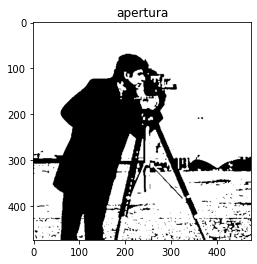

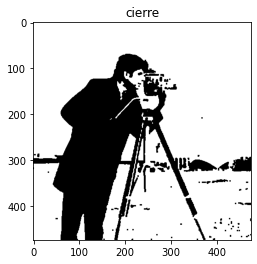

In [4]:
# A continuación a la imagen binaria se le aplican las operaciones de "apertura" y "cierre" morfológicos.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)) # creamos primero el elemento estructurante

# opened_image = cv2.open(image,kernel) # dilatamos con la máscara creada
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel) # realizamos la apertura
plt.title('apertura')
plt.imshow(opened_image, cmap="gray")
plt.show()

closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel) # realizamos el cierre
plt.title('cierre')
plt.imshow(closed_image, cmap="gray")
plt.show()

*Ejercicio:* Comprobar el efecto de las operaciones morfológicas estudiadas usando otros tamaños y formas de elementos estructurantes.

*Ejercicio:* Extraer el contorno de los objetos de una imagen binaria usando morfología matemática.

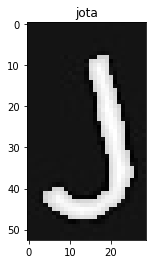

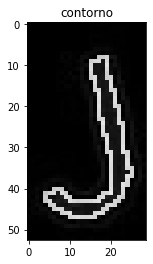

In [5]:
# Cargamos la imagen "jota" y le extraemos el contorno restándole a la imagen el resultado de su erosión.
plt.title('jota')
image = cv2.imread("jota.jpg")
image = 255 - image
plt.imshow(image, cmap="gray")
plt.show()

plt.title('contorno')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)) # creamos primero el elemento estructurante
eroded_image = cv2.erode(image,kernel) # erosionamos la imagen con la misma máscara anterior
contour = image - eroded_image # le restamos a la imagen su erosión
plt.imshow(contour, cmap="gray")
plt.show()

### Morfología matemática aplicada a imágenes en niveles de gris

A continuación, se aplican las operaciones de erosión y dilatación a imágenes en niveles de gris.

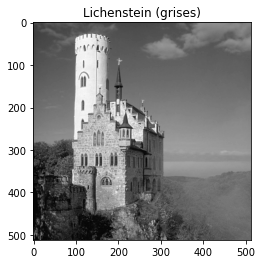

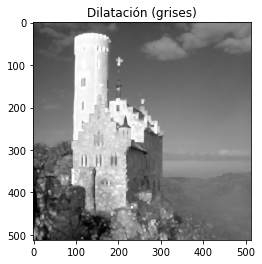

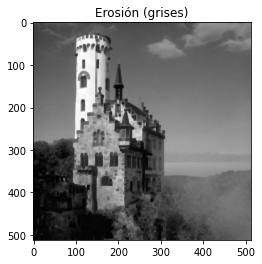

In [6]:
# Se carga la imagen del castillo de Lichtenstein en niveles de gris
plt.title('Lichenstein (grises)')
image = cv2.imread("Lichtenstein_img_processing_test.png",0)
plt.imshow(image, cmap="gray")
plt.show()

# Primero se dilata con un elemento estructurante creado
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
gray_dilated_image = cv2.dilate(image,kernel)
plt.title('Dilatación (grises)')
plt.imshow(gray_dilated_image,cmap="gray")
plt.show()

# Luego, se erosiona la imagen original con el mismo elemento estructurante
gray_eroded_image = cv2.erode(image,kernel)
plt.title('Erosión (grises)')
plt.imshow(gray_eroded_image,cmap="gray")
plt.show()

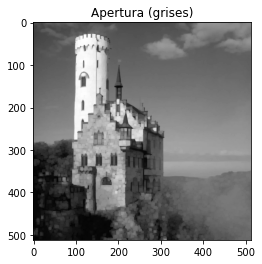

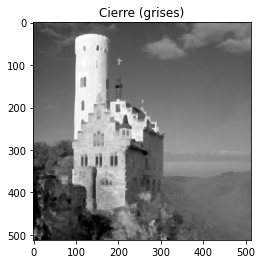

In [7]:
# Apertura y cierre en niveles de gris

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

aux = cv2.erode(image,kernel)
gray_opened_image = cv2.dilate(aux,kernel)
plt.title('Apertura (grises)')
plt.imshow(gray_opened_image,cmap="gray")
plt.show()

aux2 = cv2.dilate(image,kernel)
gray_closed_image = cv2.erode(aux2,kernel)
plt.title('Cierre (grises)')
plt.imshow(gray_closed_image,cmap="gray")
plt.show()

uint8


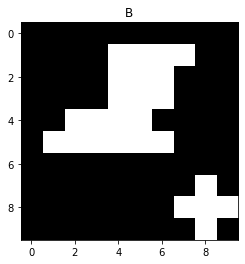

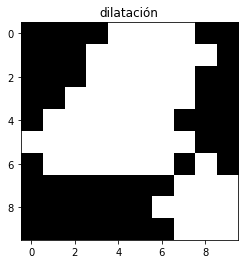

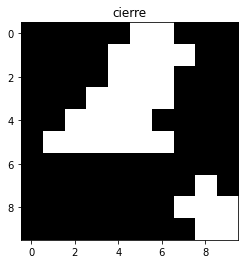

In [30]:
# Cargamos la imagen "jota" y le extraemos el contorno restándole a la imagen el resultado de su erosión.
B = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
              [0, 0, 0, 0, 1, 1, 1, 1, 0, 0 ],
              [0, 0, 0, 0, 1, 1, 1, 0, 0, 0 ],
              [0, 0, 0, 0, 1, 1, 1, 0, 0, 0 ],
              [0, 0, 1, 1, 1, 1, 0, 0, 0, 0 ],
              [0, 1, 1, 1, 1, 1, 1, 0, 0, 0 ],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0 ],
              [0, 0, 0, 0, 0, 0, 0, 1, 1, 1 ],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0 ]], dtype=np.uint8)

E = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize=(3,3))
print(E.dtype)
E = np.array([[0, 1, 0], 
             [1, 1, 1],
             [0, 1, 0]], dtype=np.uint8)


plt.figure()
plt.title('B')
plt.imshow(B, cmap="gray")

#plt.figure()
#plt.title('E')
#plt.imshow(E,cmap="gray")
    

dilated_image = cv2.dilate(B, E) 
eroded_image = cv2.erode(dilated_image, E) 

plt.figure()
plt.title('dilatación')
plt.imshow(dilated_image, cmap="gray")
plt.show()

plt.figure()
plt.title('cierre')
plt.imshow(eroded_image, cmap="gray")
plt.show()